In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import folium
plt.style.use('ggplot')


In [19]:
df = pd.read_csv('../.gitignore/PPP_data_to_150k.csv')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91018 entries, 0 to 91017
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   LoanAmount     91018 non-null  float64
 1   City           91017 non-null  object 
 2   State          91018 non-null  object 
 3   Zip            91017 non-null  float64
 4   NAICSCode      88767 non-null  float64
 5   BusinessType   90949 non-null  object 
 6   RaceEthnicity  91018 non-null  object 
 7   Gender         91018 non-null  object 
 8   Veteran        91018 non-null  object 
 9   NonProfit      3016 non-null   object 
 10  JobsRetained   82822 non-null  float64
 11  DateApproved   91018 non-null  object 
 12  Lender         91018 non-null  object 
 13  CD             91018 non-null  object 
dtypes: float64(4), object(10)
memory usage: 9.7+ MB


,LoanAmount,City,State,Zip,NAICSCode,BusinessType,RaceEthnicity,Gender,Veteran,NonProfit,JobsRetained,DateApproved,Lender,CD
0,149995.0,PARKER,CO,80134.0,541618.0,Subchapter S Corporation,White,Unanswered,Unanswered,NaN,9.0,04/29/2020,"Harvest Small Business Finance, LLC",CO - 04
1,149947.0,SNOWMASS VLG,CO,81615.0,NaN,Limited Liability Company(LLC),Unanswered,Unanswered,Unanswered,NaN,11.0,05/03/2020,"U.S. Bank, National Association",CO - 03
2,149945.0,DENVER,CO,80221.0,221115.0,Limited Liability Company(LLC),Unanswered,Unanswered,Unanswered,NaN,19.0,04/28/2020,Customers Bank,CO - 01
3,149925.0,MONUMENT,CO,80132.0,541940.0,Corporation,Unanswered,Female Owned,Non-Veteran,NaN,15.0,04/07/2020,Integrity Bank & Trust,CO - 04
4,149900.0,DENVER,CO,80230.0,484121.0,Subchapter S Corporation,Unanswered,Unanswered,Unanswered,NaN,9.0,04/29/2020,Colorado Enterprise Fund,CO - 01


In [20]:
df2 = df[~df.RaceEthnicity.str.contains("Unanswered")]


In [21]:
ethnicities = df2['RaceEthnicity'].unique()
# ethnicities[3] = 'American Indian \n or Alaska Native'
# ethnicities[4] = 'Black or \n African American'
ethnicities

array(['White', 'Hispanic', 'American Indian or Alaska Native', 'Asian',
       'Black or African American', 'Puerto Rican'], dtype=object)

In [22]:
def split_ethnicities(ethnicities):
    dataframes = [df2[df2['RaceEthnicity'] == name] for name in ethnicities]
    return dataframes


In [23]:
white_df, hispanic_df, am_indian_alaska_df, asian_df, black_df, puerto_rican_df = split_ethnicities(ethnicities)


In [24]:
ethnicity_dfs = [white_df, hispanic_df, am_indian_alaska_df, asian_df, black_df, puerto_rican_df]


In [25]:
chart_colors = ['#003f5c', '#bc5090','#58508d', '#dd5182','#ff6361', '#ffa600']

In [26]:
# average loan amount for each ethnicity
def avg_loan_by_ethnicity(ethnicities, ethnicity_dfs):
    '''
    Computes average loan amount for each dataframe in inputted list.

    Returns: Dictionary of averages for each ethnicity in the form of ethnicity:average
    '''
    avg_loan = {eth:round(df['LoanAmount'].mean(),2) for eth, df in zip(ethnicities, ethnicity_dfs)}
    return avg_loan
ethnicity_avg_loan = avg_loan_by_ethnicity(ethnicities, ethnicity_dfs)
ethnicity_avg_loan


{'White': 46412.07,
 'Hispanic': 35137.54,
 'American Indian or Alaska Native': 45856.46,
 'Asian': 41364.28,
 'Black or African American': 29041.72,
 'Puerto Rican': 4375.0}

In [27]:
ethnicity_avg_loans = [white_avg, hispanic_avg, am_indian_alaska_avg, asian_avg, black_avg, puerto_rican_avg]


NameError: name 'white_avg' is not defined

In [28]:
#graph loan amounts 
def average_loan_ethnicity(ethnicity_avg_loan, chart_colors, save_loc):
    fig, ax = plt.subplots(1, figsize=(12,4), dpi=700)
    keys = ethnicity_avg_loan.keys()
    averages = ethnicity_avg_loan.values()
    bar = ax.bar(keys, averages)
    for i in range(len(ethnicity_avg_loan)):
        bar[i].set_color(chart_colors[i])
    plt.xticks(rotation=45, fontsize=12, horizontalalignment='right')
    ax.set_xlabel('Ethnicity', fontsize= 16)
    ax.set_ylabel('Average Loan Amount in $', fontsize= 16)
    ax.set_title('Average Loan Amount by Ethnicity in Colorado', fontsize=18)
    
    plt.savefig(save_loc, bbox_inches='tight')
    

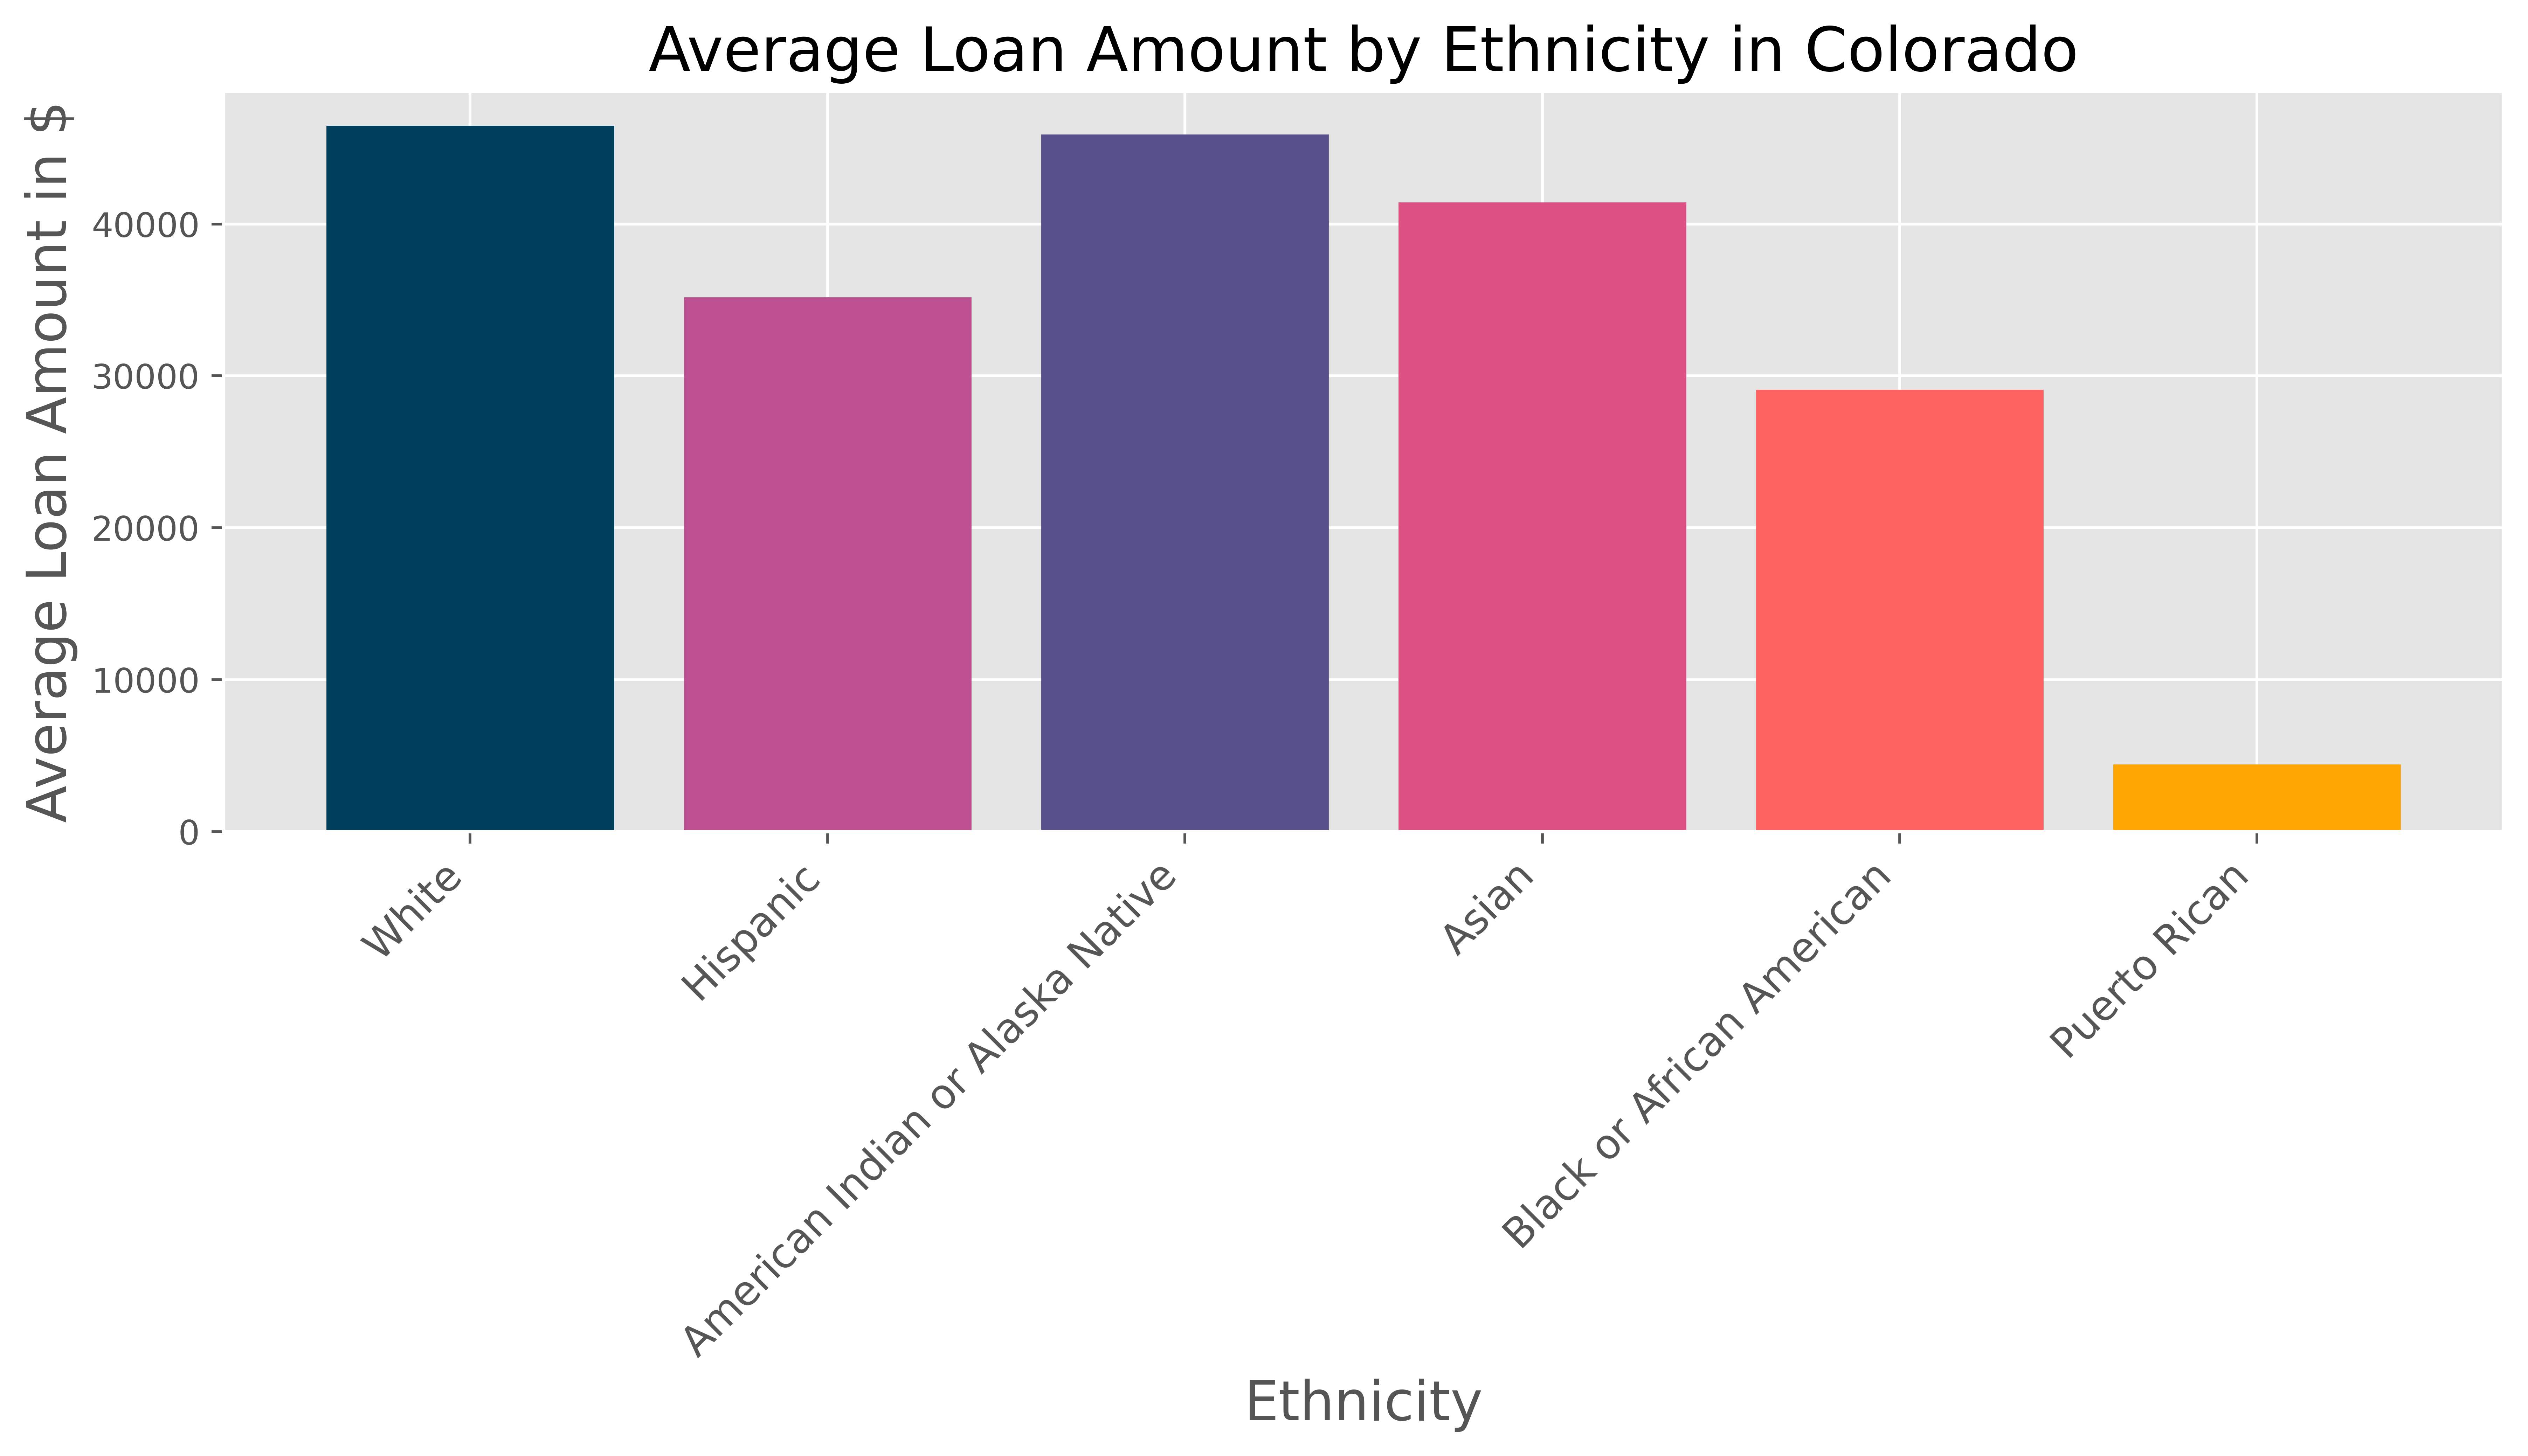

In [29]:
average_loan_ethnicity(ethnicity_avg_loan, chart_colors, '../images/avg_loan_ethnicity.png')


In [30]:
count_zips = white_df.groupby(['Zip']).count()['LoanAmount']
count_zips.sort_values(ascending=False).head(5)

Zip
80525.0    97
80487.0    93
80524.0    86
80112.0    76
81625.0    73
Name: LoanAmount, dtype: int64

In [31]:
#top zip codes for each ethnicity
def top_zip(ethnicity_dfs, ethnicities):
    top_dict = {}
    for eth, df in zip(ethnicities, ethnicity_dfs):
        df['Zip'] = df['Zip'].astype(int)
        count_zips = df.groupby(['Zip'])['LoanAmount'].count()
        #count_zips['Zip'].astype(int)
        sort_zip = count_zips.sort_values(ascending=False).head(5)
        top_dict[eth]= sort_zip
        
    return top_dict

top_zips = top_zip(ethnicity_dfs, ethnicities)
top_zips

/Users/jenniferoshea/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


{'White': Zip
 80525    97
 80487    93
 80524    86
 80112    76
 81625    73
 Name: LoanAmount, dtype: int64,
 'Hispanic': Zip
 81101    35
 80918    24
 80907    22
 80903    18
 80904    17
 Name: LoanAmount, dtype: int64,
 'American Indian or Alaska Native': Zip
 80211    3
 80221    2
 80023    2
 80134    2
 80206    2
 Name: LoanAmount, dtype: int64,
 'Asian': Zip
 81101    13
 80111    12
 80014    11
 81008    10
 80027    10
 Name: LoanAmount, dtype: int64,
 'Black or African American': Zip
 80012    6
 80220    6
 80224    3
 80017    3
 80205    3
 Name: LoanAmount, dtype: int64,
 'Puerto Rican': Zip
 80203    1
 Name: LoanAmount, dtype: int64}

In [32]:
zips.columns

NameError: name 'zips' is not defined

In [ ]:
#graph top zips

zips

In [ ]:
zips = pd.DataFrame(top_zips)
zips.fillna(0, inplace=True)
zips['total'] = zips['White'] + zips['American Indian or Alaska Native'] + zips['Asian'] + zips['Black or African American']+ zips['Puerto Rican'] + zips['Hispanic']
zips = pd.DataFrame(zips).sort_values('total')    
zips.drop('total', axis=1,inplace=True)


In [ ]:
ax = zips.plot(kind='barh', stacked=True, color=chart_colors)
plt.yticks(fontsize = 12)
ax.set_xlabel('Number of Loans')
ax.set_title('Top 5 Zip Codes for Count of Loans')
plt.savefig('../images/top_zip_loancount.png')
plt.tight_layout()
plt.show()

In [ ]:
numloansSeries = df2.groupby('Zip').count().LoanAmount
COMap = folium.Map(location=[39.5501,-105.7821], tiles='Stamen Toner', zoom_start=6.5)
COMap

In [ ]:
#group the dataframe by zip code and count the number of stores in each zip code
numloansSeries = df2.groupby('Zip').count().LoanAmount
#initialize an empty dataframe to store this new data
numloansByZip = pd.DataFrame()
#populate the new dataframe with a 'zipcode' column and a 'numStores' column
numloansByZip['zipcode'] = [str(i) for i in numloansSeries.index]
numloansByZip['numloans'] = numloansSeries.values

#initialize the Colorado Zipcode map
COMap = folium.Map(location=[39.5501,-105.7821], tiles='Stamen Toner', zoom_start=6.5)

state_geo = 
#draw the choropleth map. These are the key components:
#--geo_path: the geojson which you want to draw on the map [in our case it is the zipcodes in LA County]

#--data: the pandas dataframe which contains the zipcode information 
# AND the values of the variable you want to plot on the choropleth

#--columns: the columns from the dataframe that you want to use 
#[this should include a geospatial column [zipcode] and a variable [numStores]

#--key_on: the common key between one of your columns and an attribute in the geojson. 
#This is how python knows which dataframe row matches up to which zipcode in the geojson

COMap.choropleth(data=numloansByZip, geo_data='../data/Co.geojson', columns=['zipcode', 'numloans'], \
                 key_on='feature.zipcode', fill_color='YlGn', fill_opacity=1)

#laMap.save('laChoropleth.html')

In [ ]:
df2[df2['Zip'] == 69128.0]
df2.drop([71479],axis=0, inplace=True)


In [ ]:
df2[df2['Zip'] == 69128.0]

In [ ]:
top_10_loan_zip = df2.groupby(['Zip']).sum()['LoanAmount'].sort_values(ascending=False).head(10)

In [ ]:
keys = top_10_avg_loan.index.tolist()
keys_int = [int(x) for x in keys]
keys_as_str = [str(x) for x in keys]
height = top_5_avg_loan.values.tolist()
width = 0.35

fig, ax = plt.subplots(1, figsize=(12,4), dpi=300)
ax.bar(keys_as_str, height, width=width, color='#003f5c')
ax.set_xlabel('Zip Code', fontsize=14)
ax.set_ylabel('Loan Amount in $', fontsize = 14)
ax.set_title('Top 5 Zipcodes with Highest Loan Amount', fontsize=18)

In [ ]:
top_10_avg_loan = df2.groupby(['Zip', 'RaceEthnicity']).mean()['LoanAmount'].sort_values(ascending=False).head(10)
top_10_avg_loan

In [ ]:

top_dfs = [df2[df2['Zip']==x] for x in keys]
top_dfs[0]

In [33]:
counties = pd.read_csv('../data/zip_code_database.csv')
#filter zip code database for Colorado, drop unnecessary columns
co_counties = counties[counties['state']=='CO']
co_counties.drop(['decommissioned', 'acceptable_cities', 'unacceptable_cities','timezone','area_codes','world_region','country','irs_estimated_population_2015','primary_city','state'],axis=1,inplace=True)

#merge counties onto dataframe 
df_with_counties = pd.merge(df2,co_counties, left_on='Zip', right_on='zip')
df_with_counties

/Users/jenniferoshea/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,LoanAmount,City,State,Zip,NAICSCode,BusinessType,RaceEthnicity,Gender,Veteran,NonProfit,JobsRetained,DateApproved,Lender,CD,zip,type,county,latitude,longitude
0,149995.00,PARKER,CO,80134.0,541618.0,Subchapter S Corporation,White,Unanswered,Unanswered,NaN,9.0,04/29/2020,"Harvest Small Business Finance, LLC",CO - 04,80134,STANDARD,Douglas County,39.50,-104.76
1,149000.00,PARKER,CO,80134.0,812199.0,Subchapter S Corporation,White,Male Owned,Non-Veteran,NaN,0.0,06/02/2020,FirstBank,CO - 04,80134,STANDARD,Douglas County,39.50,-104.76
2,146229.00,PARKER,CO,80134.0,238990.0,Limited Liability Company(LLC),White,Male Owned,Non-Veteran,NaN,7.0,06/30/2020,"U.S. Bank, National Association",CO - 04,80134,STANDARD,Douglas County,39.50,-104.76
3,116800.00,PARKER,CO,80134.0,722511.0,Limited Liability Company(LLC),Asian,Male Owned,Non-Veteran,NaN,0.0,04/10/2020,"Community Banks of Colorado, A Division of",CO - 04,80134,STANDARD,Douglas County,39.50,-104.76
4,114500.00,PARKER,CO,80134.0,541320.0,Corporation,White,Female Owned,Non-Veteran,NaN,13.0,04/08/2020,FirstBank,CO - 04,80134,STANDARD,Douglas County,39.50,-104.76
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6765,2748.55,WOODROW,CO,80757.0,484121.0,Sole Proprietorship,White,Unanswered,Unanswered,NaN,1.0,04/14/2020,Star Tech FCU,CO - 04,80757,STANDARD,Washington County,39.98,-103.58
6766,2340.00,SEIBERT,CO,80834.0,812990.0,Sole Proprietorship,White,Female Owned,Unanswered,NaN,1.0,05/29/2020,Frontier Bank,CO - 04,80834,STANDARD,Kit Carson County,39.29,-102.86
6767,1425.00,EVERGREEN,CO,80437.0,541410.0,Limited Liability Company(LLC),White,Male Owned,Non-Veteran,NaN,1.0,04/09/2020,Evergreen National Bank,CO - 06,80437,PO BOX,Jefferson County,39.63,-105.34
6768,1311.02,AUSTIN,CO,81410.0,238910.0,Corporation,Hispanic,Unanswered,Unanswered,NaN,NaN,04/14/2020,First Colorado National Bank,CO - 03,81410,STANDARD,Delta County,38.80,-107.97


In [34]:
def top_county(ethnicity_dfs, ethnicities):
    '''
    Counts the number of loans for each Ethnicity group, sorts by top 5.

    Returns: Dictionary where Keys are the Ethnicities and values are a dataframe of top 5
    zipcodes and the count of loans from each zip.
    '''
    top_dict = {}
    for eth, df in zip(ethnicities, ethnicity_dfs):
        count_counties = df.groupby(['county']).count()['LoanAmount']
        sort_counties = count_counties.sort_values(ascending=False).head(5)
        top_dict[eth]= sort_counties
    return top_dict

top_county = top_county(ethnicity_dfs, ethnicities)
top_county

KeyError: 'county'

In [35]:
#top county bar chart
def graph_top_counties(top_county, chart_colors, saveloc):
    counties = pd.DataFrame(top_county)
    counties.fillna(0, inplace=True)
    counties['total'] = counties['White'] + counties['American Indian or Alaska Native'] + counties['Asian'] + \
        counties['Black or African American']+ counties['Puerto Rican'] + counties['Hispanic']
    counties = pd.DataFrame(counties).sort_values('total')    
    counties.drop('total', axis=1,inplace=True)
    
    
    ax = counties.plot(kind='barh', stacked=True, color=chart_colors,figsize=(10,6))
    plt.yticks(fontsize = 16)
    ax.set_xlabel('Number of Loans', fontsize=17)
    ax.set_title('Top 8 Counties for Loans', fontsize=18)
    plt.savefig(saveloc, bbox_inches='tight')

graph_top_counties(top_county, chart_colors, '../images/top_county_loancount.png')

ValueError: DataFrame constructor not properly called!

In [36]:
demographics = pd.read_csv('../data/counties.csv')
demographics_18 = demographics[demographics['YEAR']==2018]
demographics_18 = demographics_18.iloc[:,:11]
demographics_18.columns

Index(['CTYNAME', 'YEAR', 'TOT_POP', 'Not Hisp pop', 'NH Whites', 'NH Afr Am',
       'NH Am Indian/Native', 'NH Asian', 'NH Native Hawaiian/other',
       'NH Two or more', 'Hispanic'],
      dtype='object')

In [37]:
#overall colorado demographics by ethnicity
demographic_eth_cols = ['NH Whites','Hispanic','NH Am Indian/Native','NH Asian','NH Afr Am']
total_demographics = [sum(demographics_18[x]) for x in demographic_eth_cols]
other = sum(demographics_18['NH Two or more']) + sum(demographics_18['NH Native Hawaiian/other'])
total_demographics.append(other)
total_demographics

[3868329, 1235117, 36614, 187668, 229085, 138751]

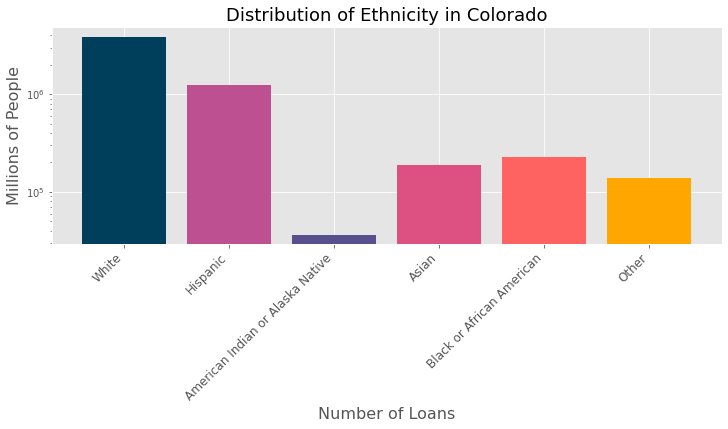

In [38]:
def graph_demographics(total_demographics, ethnicities, saveloc):
    fig, ax = plt.subplots(1,figsize=(12,4))
    ethnicities_dem = ethnicities[:-1]
    ethnicities_dem=np.append(ethnicities_dem, 'Other')
    plt.bar(ethnicities_dem, total_demographics, color=chart_colors)
    plt.xticks(rotation=45, fontsize=12, horizontalalignment='right')
    ax.set_yscale('log')
    ax.set_xlabel('Number of Loans', fontsize=16)
    ax.set_ylabel('Millions of People', fontsize=16)
    ax.set_title('Distribution of Ethnicity in Colorado', fontsize=18)
    plt.savefig(saveloc, bbox_inches='tight')

graph_demographics(total_demographics, ethnicities, '../images/demographics.png')

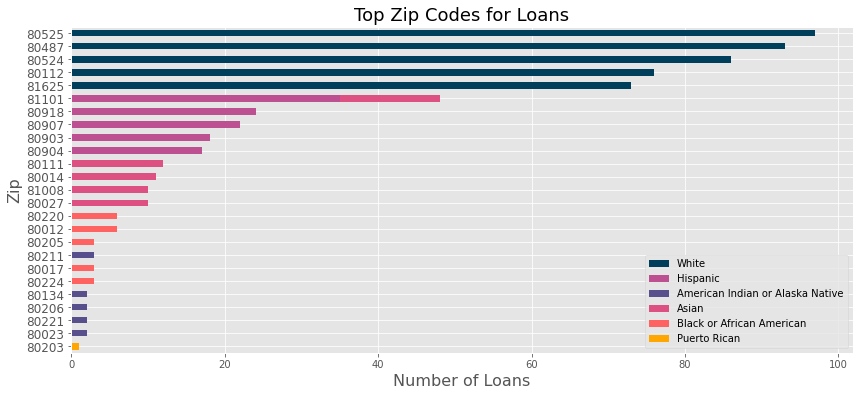

In [39]:
def graph_top_zips(top_zips, chart_colors, saveloc):
    zips = pd.DataFrame(top_zips)
    zips.fillna(0, inplace=True)
    zips['total'] = zips['White'] + zips['American Indian or Alaska Native'] + zips['Asian'] + zips['Black or African American']+ zips['Puerto Rican'] + zips['Hispanic']
    zips = pd.DataFrame(zips).sort_values('total')    
    zips.drop('total', axis=1,inplace=True)

    ax = zips.plot(kind='barh', stacked=True, color=chart_colors,figsize=(14,6))
    plt.yticks(fontsize = 12)
    ax.set_xlabel('Number of Loans', fontsize=16)
    ax.set_ylabel('Zip',fontsize=16)
    ax.set_title('Top Zip Codes for Loans', fontsize=18)
    plt.savefig(saveloc, bbox_inches='tight')

graph_top_zips(top_zips, chart_colors, '../images/top_zip_loancount.png')

In [40]:
#demographics by county
top_counties_loans= ['Denver County', 'El Paso County', 'Jefferson County','Arapahoe County','Larimer County','Adams County','Douglas County','Weld County']
county_rows = [demographics_18[demographics_18['CTYNAME'] == x] for x in top_counties_loans]

#iterate through list of counties and pull out populations for each ethnicity
demographics_by_county =[]
for i in range(len(county_rows)):
    county_list = []
    for eth in demographic_eth_cols:
        county_list.append(int(county_rows[i][eth].values))
    
    other = county_rows[i]['NH Two or more'].values + county_rows[i]['NH Native Hawaiian/other'].values
    county_list.append(int(other))
    demographics_by_county.append(county_list)
demographics_by_county[::-1]

[[205687, 93183, 1580, 5071, 3634, 5150],
 [280777, 30763, 1035, 17387, 4660, 8154],
 [253905, 207045, 3023, 20795, 16321, 10779],
 [289145, 40855, 1573, 8016, 3418, 7511],
 [390078, 126911, 2890, 40799, 68474, 22063],
 [452555, 89889, 2989, 16896, 6637, 11267],
 [491494, 124622, 4465, 20872, 43321, 29082],
 [390336, 212562, 3650, 28033, 64126, 17785]]

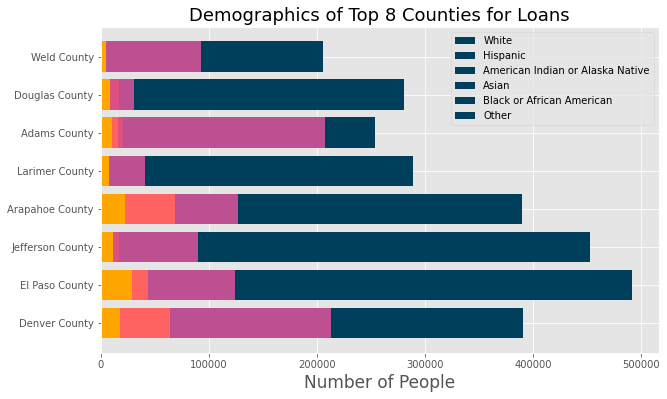

In [49]:
#top county bar chart
def graph_top_county_demographics(demographics_by_county, ethnicities, top_counties_loans, chart_colors, saveloc):
    ethnicities_dem = ethnicities[:-1]
    ethnicities_dem=np.append(ethnicities_dem, 'Other')
    fig, ax = plt.subplots(1,figsize=(10,6))
    for x in range(len(demographics_by_county)):
        plt.barh(top_counties_loans[x], demographics_by_county[x], label=top_counties_loans[x], color=chart_colors)
        
    ax.set_xlabel('Number of People', fontsize=17)
    ax.set_title('Demographics of Top 8 Counties for Loans', fontsize=18)
    plt.legend(ethnicities_dem)
    plt.savefig(saveloc, bbox_inches='tight')

graph_top_county_demographics(demographics_by_county, ethnicities, top_counties_loans, chart_colors, '../images/top_county_loancount_demographic.png')

In [50]:
## avg amount of loan compared to jobs retained by ethnicity
avg_loan_by_ethnicity = [round(x['LoanAmount'].mean(),2) for x in ethnicity_dfs]
avg_jobs_retained_by_ethnicity = [round(x['JobsRetained'].mean(),3) for x in ethnicity_dfs]

avg_jobs_loans = [(x,y) for x,y in zip(avg_jobs_retained_by_ethnicity, avg_loan_by_ethnicity)]
avg_jobs_loans

[(6.304, 46412.07),
 (5.946, 35137.54),
 (7.882, 45856.46),
 (7.915, 41364.28),
 (5.337, 29041.72),
 (1.0, 4375.0)]

In [48]:
#graph jobs retained vs loan amount
loan_by_ethnicity = [x['LoanAmount'].values for x in ethnicity_dfs]
jobs_retained_by_ethnicity = [x['JobsRetained'].values for x in ethnicity_dfs]

jobs_retained_by_ethnicity.fillna(0)

AttributeError: 'list' object has no attribute 'fillna'